In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1> K MEANS CLUSTERING:- </h1>

In [150]:
df = pd.read_csv('Ecommerce.csv')


In [151]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [153]:
X = df.drop('ID', axis= 1)

In [154]:
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


In [155]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [156]:
X[:5]

array([[0.06688963, 0.22088353, 0.03257084, 0.01301296, 0.45330739,
        0.4017094 ],
       [0.41220736, 0.14457831, 0.0973327 , 0.00234276, 0.44357977,
        0.29059829],
       [0.39297659, 0.36947791, 0.17623449, 0.34768545, 0.48054475,
        0.6991453 ],
       [0.5451505 , 0.29317269, 0.18209691, 0.35004096, 0.28793774,
        0.34188034],
       [0.14297659, 0.29718876, 0.027523  , 0.02647139, 0.47276265,
        0.44273504]])

In [157]:
from sklearn.cluster import KMeans

k = 6
Kmeans = KMeans(n_clusters=k, init='random', random_state=42)
Kmeans.fit(X)

KMeans(init='random', n_clusters=6, random_state=42)

In [158]:
y_pred = Kmeans.predict(X)
y_pred

array([4, 2, 0, ..., 1, 3, 0], dtype=int32)

In [159]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [160]:
print(f'WCSS: {Kmeans.inertia_}')

WCSS: 213.90257073289106


In [161]:
from sklearn.metrics import silhouette_score
print(f'Silhoeutte Score : {silhouette_score(X, Kmeans.labels_)}')

Silhoeutte Score : 0.18265751671728248


<h3> Performance check using Hyperparamter tuning :- </h3>

<h4> Inertia : Within cluster sum of squares:- </h4>

In [162]:
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    results = kmeans.fit(X)
    inertias.append(results.inertia_) 
inertias

[467.3446956604182,
 350.141491407556,
 280.1647840045068,
 247.2480623172971,
 229.46524247927897,
 213.90257073289106,
 203.72754988902386,
 192.62775545051772,
 183.90734465117202,
 177.63346747218168]

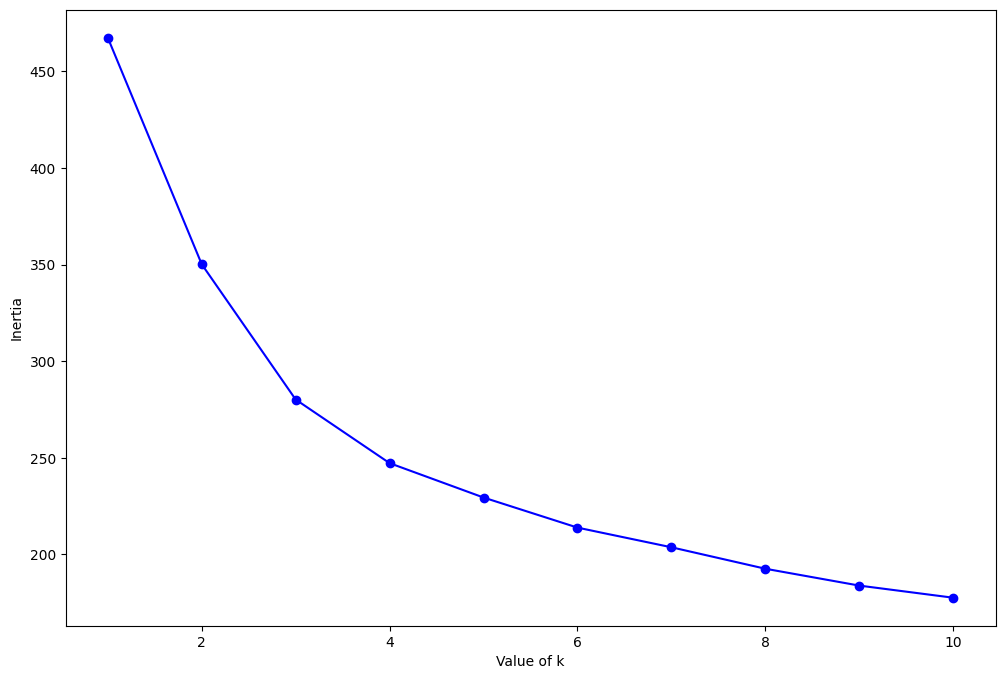

In [163]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, 'bo-')
plt.xlabel('Value of k')
plt.ylabel('Inertia')
plt.show()

<h4> Silhouette Score:- </h4>

In [164]:
silhouette_scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    results = kmeans.fit(X)
    score = silhouette_score(X, results.labels_)
    silhouette_scores.append(score)

silhouette_scores

[np.float64(0.2796391243704177),
 np.float64(0.26261203215343076),
 np.float64(0.2108404992330738),
 np.float64(0.19400412061943428),
 np.float64(0.18265751671728248),
 np.float64(0.16772817006287286),
 np.float64(0.17216334610053802),
 np.float64(0.15785618036825522),
 np.float64(0.15746347224849833)]

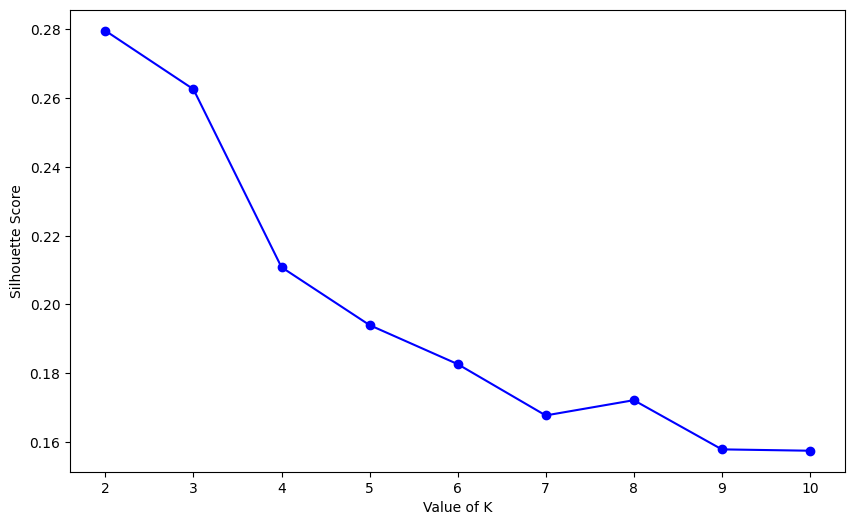

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show()

In [166]:
kmeans = KMeans(n_clusters=3, init='random', random_state=42)
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [167]:
print(f' WCSS : {kmeans.inertia_}')

 WCSS : 280.1647840045068


In [168]:
print(f'silhouette_score : {silhouette_score(X, kmeans.labels_)}')

silhouette_score : 0.26261203215343076


<h2> 2D VISUALIZATION USING T-SNE:- </h2>

In [169]:
from sklearn.manifold import TSNE

tsne = TSNE(2)
components_tsne = tsne.fit_transform(X)

In [170]:
clusters_tsne = pd.DataFrame(components_tsne, columns=['X1', 'X2'])
clusters_tsne['label'] = kmeans.labels_
clusters_tsne.head()

,X1,X2,label
0,-14.665445,11.307550,2
1,-15.905750,-4.890355,2
2,32.548603,4.732212,0
3,46.559784,-16.773331,0
4,-14.480218,13.352928,2


Text(0, 0.5, 't-SNE Feature 2')

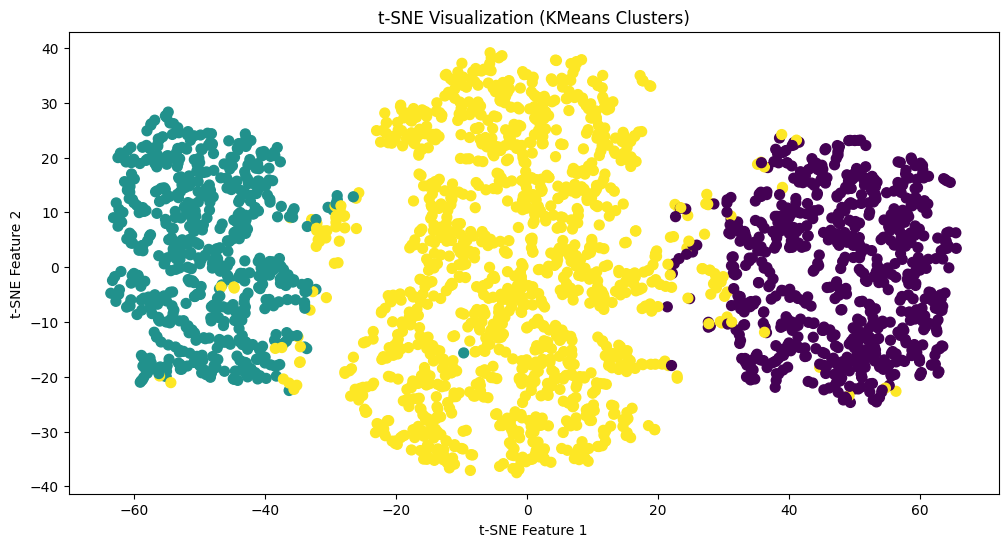

In [171]:
plt.figure(figsize=(12, 6))
plt.scatter(components_tsne[:, 0], components_tsne[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title("t-SNE Visualization (KMeans Clusters)")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")

<hr>

<h1> K MEANS ++:- </h1>

In [172]:
from sklearn.cluster import KMeans

k = 3 
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)


KMeans(n_clusters=3, random_state=42)

In [173]:
print(f'WCSS: {kmeans.inertia_}')

WCSS: 280.1647840045068


In [174]:
print(f'silhouette_score : {silhouette_score(X, kmeans.labels_)}')

silhouette_score : 0.26261203215343076


<hr>

<h1>GAUSIAN MIXTURE MODEL:-</h1>

In [175]:
from sklearn.mixture import GaussianMixture

In [176]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

In [177]:
labels = gmm.predict(X)
labels

array([0, 0, 3, ..., 2, 1, 3])

In [178]:
np.unique(labels)

array([0, 1, 2, 3])

In [179]:
tsne = TSNE(2)
components_tsne_gmm = tsne.fit_transform(X)

In [180]:
clusters_tsne = pd.DataFrame(components_tsne_gmm, columns=['X3', 'X4'])
clusters_tsne['label'] = labels
clusters_tsne.head()

,X3,X4,label
0,-14.665445,11.307550,0
1,-15.905750,-4.890355,0
2,32.548603,4.732212,3
3,46.559784,-16.773331,3
4,-14.480218,13.352928,0


Text(0, 0.5, 't-SNE Feature 2')

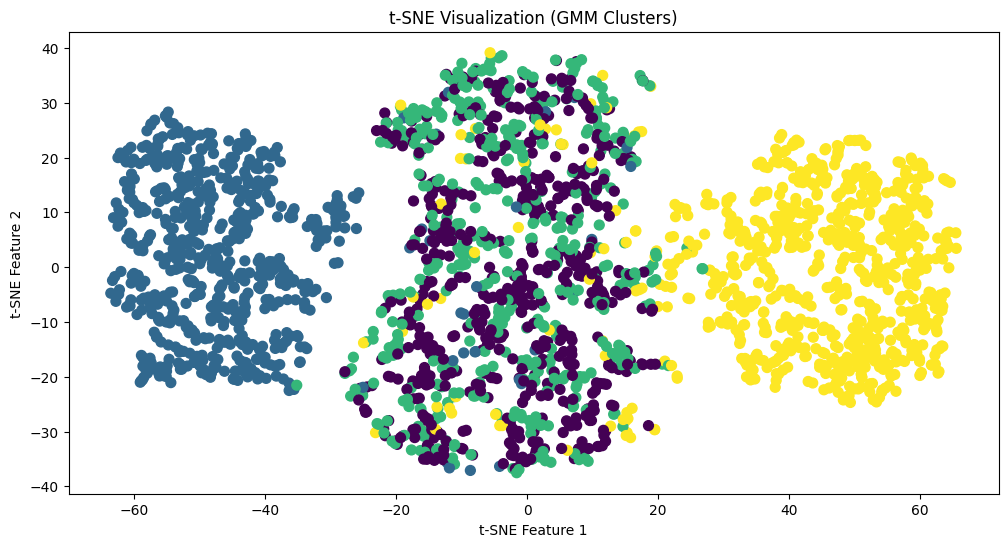

In [181]:
plt.figure(figsize=(12, 6))
plt.scatter(components_tsne_gmm[:, 0], components_tsne_gmm[:, 1], c=labels, cmap='viridis', s=50)
plt.title("t-SNE Visualization (GMM Clusters)")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")